# Tugas 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/hasil_prepros.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,"Waspadai 7 Tanda Tubuh Kekurangan Vitamin B12,...","Rabu, 02 Okt 2024 20:08 WIB",Jakarta - Vitamin B12 adalah nutrisi penting y...,Kesehatan,Jakarta Vitamin B adalah nutrisi penting yang...,jakarta vitamin b adalah nutrisi penting yang...,"['jakarta', 'vitamin', 'b', 'adalah', 'nutrisi...",jakarta vitamin b nutrisi dibutuhkan tubuh mem...
1,Bentuk Tubuh Seperti Ini Disebut Lebih Berisik...,"Rabu, 02 Okt 2024 19:00 WIB",Jakarta - Sudah sejak lama peneliti mengukur r...,Kesehatan,Jakarta Sudah sejak lama peneliti mengukur ri...,jakarta sudah sejak lama peneliti mengukur ri...,"['jakarta', 'sudah', 'sejak', 'lama', 'penelit...",jakarta peneliti mengukur risiko penyakit kron...
2,Apa yang Terjadi Jika Kadar Gula Darah Tinggi?...,"Rabu, 02 Okt 2024 18:00 WIB",Jakarta - Gula darah yang tinggi atau hipergli...,Kesehatan,Jakarta Gula darah yang tinggi atau hiperglik...,jakarta gula darah yang tinggi atau hiperglik...,"['jakarta', 'gula', 'darah', 'yang', 'tinggi',...",jakarta gula darah hiperglikemia kadar glukosa...
3,"Wajib Perhatikan, Ini Tanda Pekerja Stres dan ...","Rabu, 02 Okt 2024 16:31 WIB",Jakarta - Setiap pekerjaan pasti memiliki beba...,Kesehatan,Jakarta Setiap pekerjaan pasti memiliki beban...,jakarta setiap pekerjaan pasti memiliki beban...,"['jakarta', 'setiap', 'pekerjaan', 'pasti', 'm...",jakarta pekerjaan memiliki beban berbedabeda k...
4,"Menyoal Sindrom Kematian Mendadak, Ini Penyeba...","Rabu, 02 Okt 2024 16:03 WIB",Jakarta - Sindrom kematian mendadak adalah ist...,Kesehatan,Jakarta Sindrom kematian mendadak adalah isti...,jakarta sindrom kematian mendadak adalah isti...,"['jakarta', 'sindrom', 'kematian', 'mendadak',...",jakarta sindrom kematian mendadak istilah meng...


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df)



Nilai sebelum dan sesudah konversi:
{'Kesehatan': 0, 'Olahraga': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0   Waspadai 7 Tanda Tubuh Kekurangan Vitamin B12,...   
1   Bentuk Tubuh Seperti Ini Disebut Lebih Berisik...   
2   Apa yang Terjadi Jika Kadar Gula Darah Tinggi?...   
3   Wajib Perhatikan, Ini Tanda Pekerja Stres dan ...   
4   Menyoal Sindrom Kematian Mendadak, Ini Penyeba...   
..                                                ...   
95   Marc Marquez Kembali Bernasib Sial di Mandallika   
96  Jokowi: Penyelenggaraan MotoGP Mandalika 2024 ...   
97  Senyum Semringah Jorge Martin Menang MotoGP Ma...   
98  Moto2 Mandalika 2024: Jaume Masia Crash, Langs...   
99  Klasemen MotoGP 2024: Sisa 5 Seri, Martin Ungg...   

                          tanggal  \
0     Rabu, 02 Okt 2024 20:08 WIB   
1     Rabu, 02 Okt 2024 19:00 WIB   
2     Rabu, 02 Okt 2024 18:00 WIB   
3     Rabu, 02 Okt 2024 16:31 WIB   
4     Rabu, 02 Okt 2024 16

In [ ]:
# Menyimpan DataFrame ke file CSV
df.to_csv('teks beneran bersih rill cuy.csv', index=False)

# **Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x = df['stopword_removal']
y = df['kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta vitamin b nutrisi dibutuhkan tubuh mem...
1     jakarta peneliti mengukur risiko penyakit kron...
2     jakarta gula darah hiperglikemia kadar glukosa...
3     jakarta pekerjaan memiliki beban berbedabeda k...
4     jakarta sindrom kematian mendadak istilah meng...
                            ...                        
95    lombok marc marquez gagal menyelesaikan balapa...
96    lombok presiden joko widodo mengapresiasi peny...
97    lombok jorge martin berhasil memenangkan balap...
98    lombok rider moto jaume masia mengalami crash ...
99    jakarta jorge martin menjauh francesco bagnaia...
Name: stopword_removal, Length: 100, dtype: object
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


# **TF-IDF Weighting**

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,aan,abaikan,abc,abdul,abidin,abimanyu,abirezky,abnormal,absen,absenteism,...,zannibah,zannubah,zarco,zat,zatzat,ziolkowska,zivan,zonta,zulfa,zulkarnain
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.050484,0.050484,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.043145,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.158085,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
76,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
77,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.060023,0.0,0.0,0.0,0.000000,0.0
78,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,aan,abaikan,abc,abdul,abidin,abimanyu,abirezky,abnormal,absen,absenteism,...,zannibah,zannubah,zarco,zat,zatzat,ziolkowska,zivan,zonta,zulfa,zulkarnain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

            Node  Degree Centrality
2289    mendadak           0.000238
1692    kematian           0.000238
0            aan           0.000000
2805       pakar           0.000000
2810   pamungkas           0.000000
...          ...                ...
1407    iongwong           0.000000
1408          iq           0.000000
1409      iqamah           0.000000
1410       iqbal           0.000000
4207  zulkarnain           0.000000

[4208 rows x 2 columns]


In [ ]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
print(filtered_df_train_tfidf_binary)


DataFrame setelah menghapus fitur di bawah top 10:
    mendadak  kematian  aan  pakar  pamungkas  palupi  palpitasi  pake  \
0          0         0    0      0          0       0          0     0   
1          0         0    0      0          0       0          0     0   
2          0         0    0      0          0       0          0     0   
3          0         0    0      0          0       0          0     0   
4          0         0    0      0          0       0          0     0   
..       ...       ...  ...    ...        ...     ...        ...   ...   
75         0         0    0      0          0       0          0     0   
76         0         0    0      0          0       0          0     0   
77         0         0    0      0          0       0          0     0   
78         0         0    0      0          0       0          0     0   
79         0         0    0      0          0       0          0     0   

    pakarpakar  pakai  
0            0      0  
1          

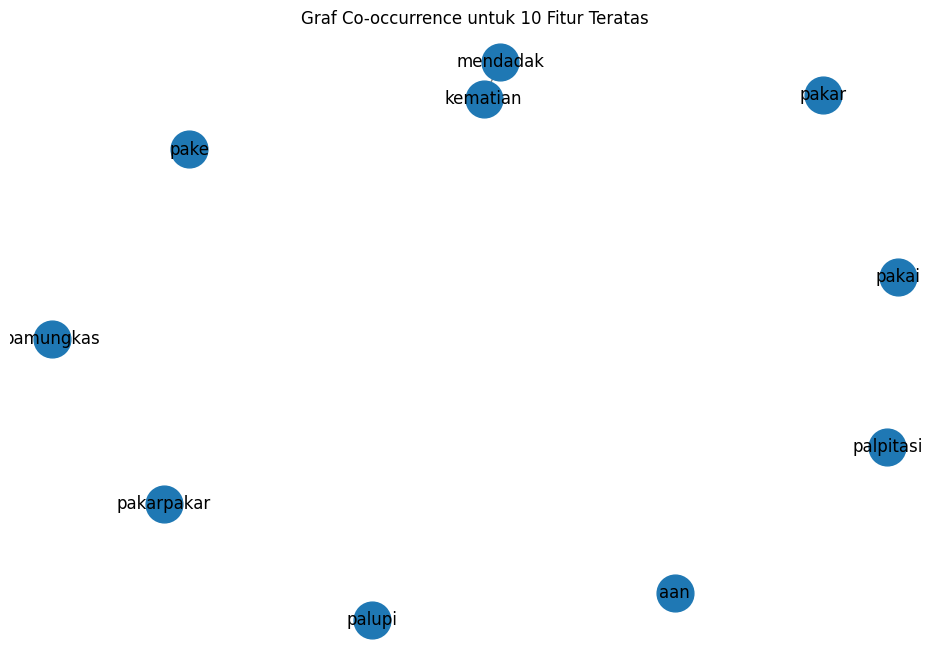

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf Co-occurrence untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

         Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0    mendadak           0.000238              0.111111                     0.0
1    kematian           0.000238              0.111111                     0.0
2         aan           0.000000              0.000000                     0.0
3       pakar           0.000000              0.000000                     0.0
4   pamungkas           0.000000              0.000000                     0.0
5      palupi           0.000000              0.000000                     0.0
6   palpitasi           0.000000              0.000000                     0.0
7        pake           0.000000              0.000000                     0.0
8  pakarpakar           0.000000              0.000000                     0.0
9       pakai           0.000000              0.000000                     0.0


# Ke 2 : Ambil 1 Berita

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
news_text_1 = """ jakarta vitamin b nutrisi dibutuhkan tubuh memproduksi energi ditemukan makanan daging sapi kambing
ikan sayuran bayam vitamin b mudah ditemukan kekurangan vitamin disepelekan orang memperhatikan asupan makanan seharihari
kekurangan vitamin b berdampak serius kesehatan dikutip laman healthline gejala kekurangan vitamin b kelelahan salah gejala
utamanya kelelahan kekurangan vitamin b mengurangi produksi sel darah merah mengganggu pengiriman oksigen tubuh kondisi memicu
anemia megaloblastik ditandai terbentuknya sel darah merah abnormal matang akibatnya tubuh mengalami kelelahan selsel menerima
oksigen berfungsi memicu penyakit kuning kekurangan b menyebabkan berkurangnya sel darah merah sehat kulit pucat kekurangan
vitamin b menyebabkan penyakit kuning kondisi kulit putih mata berubah kekuningan tingginya kadar bilirubin darah sakit kepala sakit
kepala gejala kekurangan vitamin b orang dewasa anakanak penelitian menemukan orang migrain memiliki kadar vitamin b rendah
dibandingkan mengalami migrain orang memiliki kadar vitamin b tertinggi memiliki risiko migrain persen rendah dibandingkan
memiliki kadar terendah depresi kekurangan vitamin b meningkatkan kadar homosistein asam amino meningkatkan risiko depresi
menyebabkan stres oksidatif kerusakan dna tubuh penelitian orang depresi cenderung memiliki kadar vitamin b rendah dibandingkan
mengalami gangguan mental pencernaan kekurangan vitamin b memengaruhi sistem pencernaan menyebabkan gejala diare mual sembelit
perut kembung pencernaan orang dewasa anakanak gangguan konsentrasi mental penurunan kemampuan mental kekurangan vitamin b berdampak
negatif sistem saraf pusat penelitian orang tua kadar b rendah mengalami penurunan fungsi kognitif penelitian gejala mental membaik
pengobatan vitamin b studi menemukan persen peserta mengalami peningkatan signifikan menjalani terapi penggantian vitamin b nyeri
radang mulut lidah kondisi dikenal glositis lidah merah nyeri meradang glositis kali disertai stomatitis luka peradangan mulut orang
anemia kekurangan vitamin b kondisi tanda defisiensi vitamin b anemia dampaknya luas kesehatan tubuh asupan vitamin b terhindar
gejalagejala mengganggu kesehatan kesejahteraan seharihari sucsuc """

news_text_2 = """ jakarta olahraga bermanfaat tubuh memaksakan berolahraga keras tanda berhenti olahraga pasalnya kondisi berbahaya muncul berolahraga batas kemampuan lantas tandanya ahli kesehatan jantung prof dr dr budhi setianto spjp merasakan gejala sakit dada kelelahan sesak napas berolahraga tandanya berhenti berolahraga pasalnya gejalagejala kali berkaitan kapasitas jantung berbedabeda individu kehabisan napas sesak imbuh prof budhi wawancara detikcom peringatan jantung sedunia yayasan jantung indonesia yji jakarta international equestrian park jiep jakarta timur minggu prof budhi olahraga tekanan jantung menyarankan tubuh lelah pendinginan pendinginan berjalan santai lari ringan menormalkan detak jantung istirahat tubuh pulih prof budhi menekankan menjaga hidrasi berolahraga dehidrasi memperparah kelelahan jantung keras menjaga keseimbangan cairan tubuh berolahraga lari berjalan istirahat lupa minum air putih tubuh butuh cairan sisi dr brm ario soeryo kuncoro spjp fiha fascc ahli jantung lelah berolahraga wajar menghindari kelelahan pola latihan berkelanjutan disertai istirahat teratur membantu tubuh bugar kelelahan olahraga spesifik ditentukan orang berolahraga peka kondisi tubuh abaikan sinyalsinyal kelelahan pastikan tubuh pulih berolahraga keseimbangan aktivitas fisik pemulihan kunci menjaga kesehatan jantung tubuh sucsuc
"""

# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_text_1, news_text_2], columns=['text'])

# Menampilkan DataFrame
print(data)


                                                text
0   jakarta vitamin b nutrisi dibutuhkan tubuh me...
1   jakarta olahraga bermanfaat tubuh memaksakan ...


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)


10 Fitur Terbaik:
          Feature     Score
224      vitamin  0.602644
24   berolahraga  0.433349
75       jantung  0.433349
222        tubuh  0.421170
83    kekurangan  0.348899
84     kelelahan  0.238998
77         kadar  0.222027
153        orang  0.214800
175         prof  0.192599
28         budhi  0.192599


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
               vitamin  berolahraga   jantung     tubuh  kekurangan  kelelahan  \
vitamin      1.000000     0.000000  0.000000  0.343674    1.000000   0.367573   
berolahraga  0.000000     1.000000  1.000000  0.939089    0.000000   0.929995   
jantung      0.000000     1.000000  1.000000  0.939089    0.000000   0.929995   
tubuh        0.343674     0.939089  0.939089  1.000000    0.343674   0.999673   
kekurangan   1.000000     0.000000  0.000000  0.343674    1.000000   0.367573   
kelelahan    0.367573     0.929995  0.929995  0.999673    0.367573   1.000000   
kadar        1.000000     0.000000  0.000000  0.343674    1.000000   0.367573   
orang        0.982468     0.186430  0.186430  0.512723    0.982468   0.534508   
prof         0.000000     1.000000  1.000000  0.939089    0.000000   0.929995   
budhi        0.000000     1.000000  1.000000  0.939089    0.000000   0.929995   

                kadar     orang      prof     budhi  
vitamin      1.000000  0.98

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
              vitamin  berolahraga  jantung  tubuh  kekurangan  kelelahan  \
vitamin            1            0        0      0           1          0   
berolahraga        0            1        1      1           0          1   
jantung            0            1        1      1           0          1   
tubuh              0            1        1      1           0          1   
kekurangan         1            0        0      0           1          0   
kelelahan          0            1        1      1           0          1   
kadar              1            0        0      0           1          0   
orang              1            0        0      1           1          1   
prof               0            1        1      1           0          1   
budhi              0            1        1      1           0          1   

             kadar  orang  prof  budhi  
vitamin          1      1     0      0  
berolahraga      0      0     1      1  
jantung        

In [ ]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'vitamin': 5, 'berolahraga': 7, 'jantung': 7, 'tubuh': 8, 'kekurangan': 5, 'kelelahan': 8, 'kadar': 5, 'orang': 7, 'prof': 7, 'budhi': 7}

Closeness Centrality:
 {'vitamin': 0.47368421052631576, 'berolahraga': 0.5625, 'jantung': 0.5625, 'tubuh': 0.75, 'kekurangan': 0.47368421052631576, 'kelelahan': 0.75, 'kadar': 0.47368421052631576, 'orang': 0.6923076923076923, 'prof': 0.5625, 'budhi': 0.5625}

Betweenness Centrality:
 {'vitamin': 0.0, 'berolahraga': 0.0, 'jantung': 0.0, 'tubuh': 0.2222222222222222, 'kekurangan': 0.0, 'kelelahan': 0.2222222222222222, 'kadar': 0.0, 'orang': 0.5, 'prof': 0.0, 'budhi': 0.0}


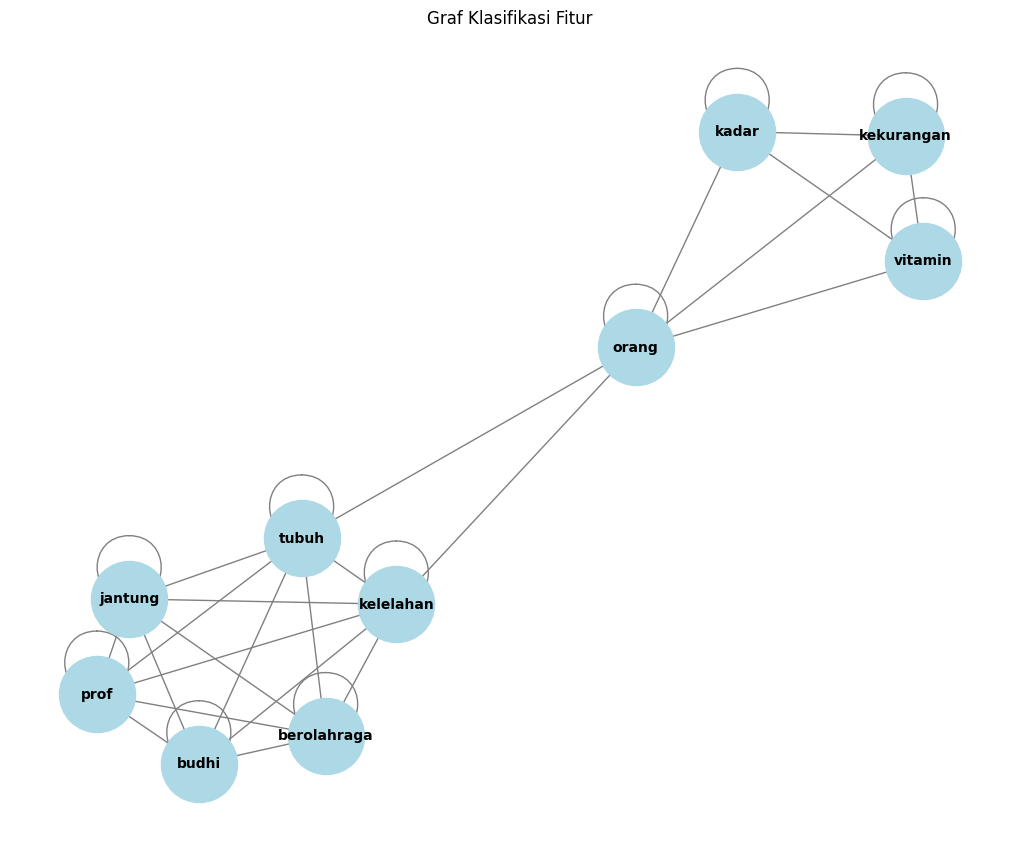

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menggambar graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Menggunakan spring layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Graf Klasifikasi Fitur")
plt.show()
